# 🛒 Superstore Sales Analysis
This project explores sales data from a superstore to enhance data visualization and wrangling skills. It includes cleaning, transformation, and visual storytelling to uncover insights.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('superstore.csv', engine = 'python')


df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [ ]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Year'] = df['Order.Date'].dt.year
df['Month'] = df['Order.Date'].dt.month
df['Day'] = df['Order.Date'].dt.day
df['Date'] = df['Order.Date'].dt.date
display(df[['Date','Day','Month','Year']])

,Date,Day,Month,Year
0,2011-01-07,7,1,2011
1,2011-01-21,21,1,2011
2,2011-08-05,5,8,2011
3,2011-08-05,5,8,2011
4,2011-09-29,29,9,2011
...,...,...,...,...
51285,2014-12-03,3,12,2014
51286,2014-12-03,3,12,2014
51287,2014-12-18,18,12,2014
51288,2014-12-25,25,12,2014


In [ ]:
df = df.drop(columns=['记录数'])
print(df.columns)

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum', 'Month', 'Day', 'Date'],
      dtype='object')


## 🧹 Data Cleaning

In [ ]:
df.isnull().sum()

,0
Category,0
City,0
Country,0
Customer.ID,0
Customer.Name,0
Discount,0
Market,0
Order.Date,0
Order.ID,0
Order.Priority,0


In [ ]:
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

I am going to check for duplicate rows

In [ ]:
df.duplicated().sum()

np.int64(0)

## 🔧 Data Wrangling

In [ ]:
#creating a new column called shipping duration
df['Shipping.Duration'] = df['Ship.Date'] - df['Order.Date']

In [ ]:
#Creating a summary table of total sales, profit, and quantity by Region, Category, and Month.
summary_table = df.groupby(['Region', 'Category', 'Month']).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()
summary_table.head()

,Region,Category,Month,Sales,Profit,Quantity
0,Africa,Furniture,1,14188,2040.621,81
1,Africa,Furniture,2,16114,3476.385,86
2,Africa,Furniture,3,9724,464.055,79
3,Africa,Furniture,4,13849,1021.380,108
4,Africa,Furniture,5,14662,1676.082,96


In [ ]:
#creating a column for profit margin i.e profit/sales
summary_table['Profit.Margin'] = summary_table['Profit'] / summary_table['Sales']

## 📊 Data Visualization

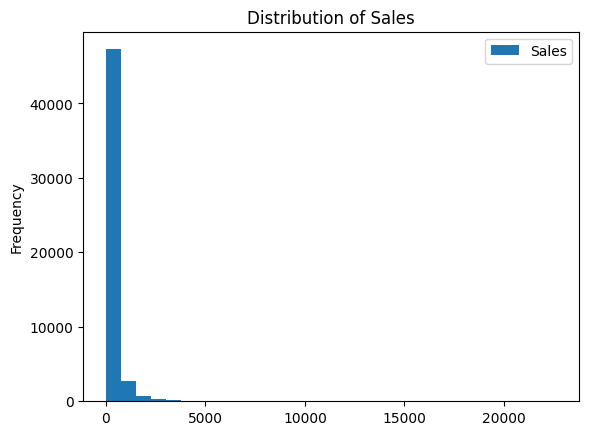

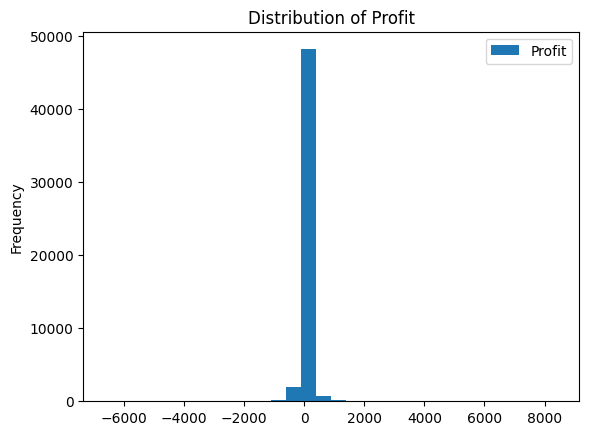

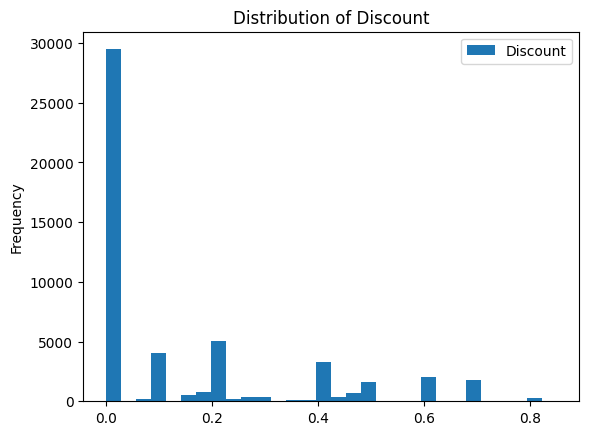

In [ ]:
#plotting the distribution of sales, profit and discount in the original df
df.plot(kind='hist', y='Sales', bins=30, title='Distribution of Sales')
df.plot(kind='hist', y='Profit', bins=30, title='Distribution of Profit')
df.plot(kind='hist', y='Discount', bins=30, title='Distribution of Discount')
plt.show()

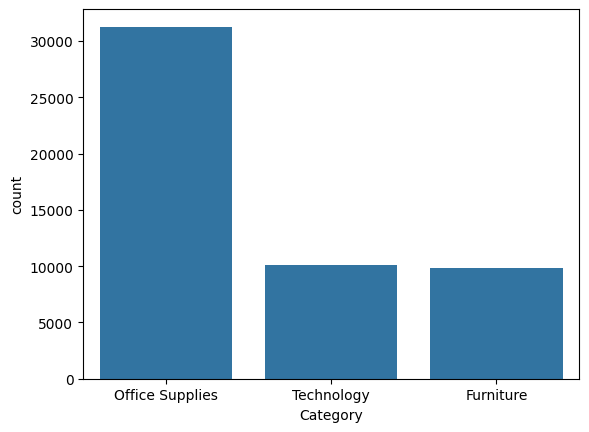

In [ ]:
#plotting a countplot for category
import seaborn as sns
sns.countplot(x='Category', data=df)
plt.show()

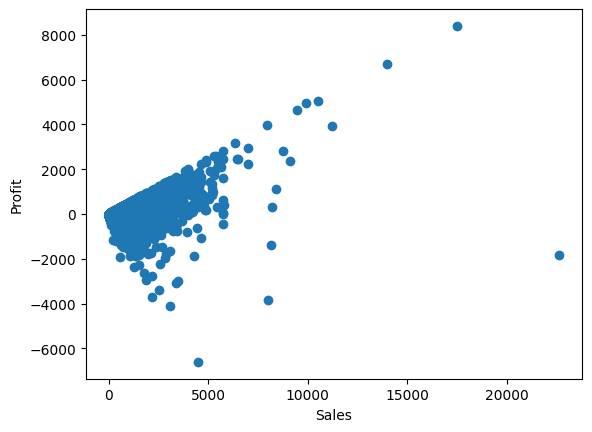

In [ ]:
#plotting a scatter plot of sales vs profit
plt.scatter(df['Sales'], df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

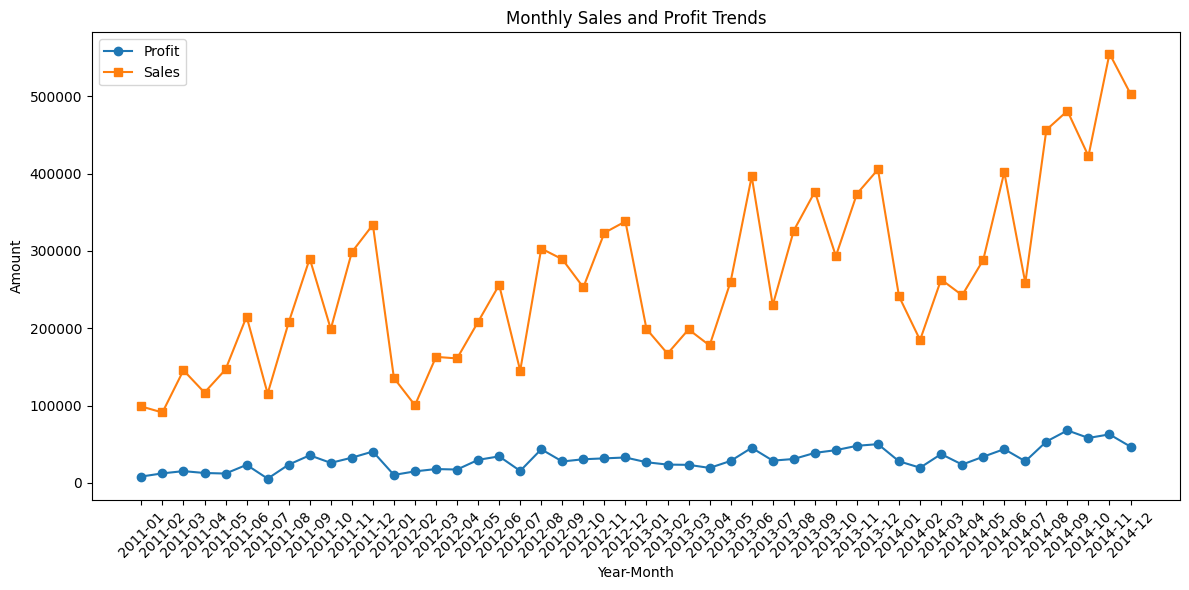

In [ ]:
#line graph showing profit and sales trends over months

# Create a 'Year-Month' column
df['YearMonth'] = df['Order.Date'].dt.to_period('M').astype(str)

# Group by 'YearMonth'
monthly_profit = df.groupby('YearMonth')['Profit'].sum()
monthly_sales = df.groupby('YearMonth')['Sales'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit.values, label='Profit', marker='o')
plt.plot(monthly_sales.index, monthly_sales.values, label='Sales', marker='s')

plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.title('Monthly Sales and Profit Trends')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

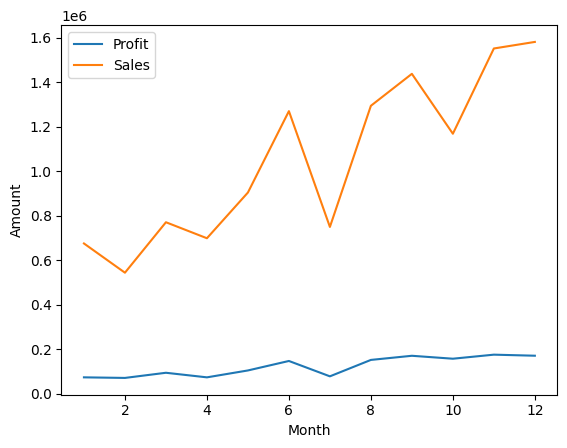

In [ ]:
#overall cumulative monthly trend

profittable = df.groupby('Month')['Profit'].sum()
salestable = df.groupby('Month')['Sales'].sum()
plt.plot(profittable.index, profittable.values, label='Profit')
plt.plot(salestable.index, salestable.values, label='Sales')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()

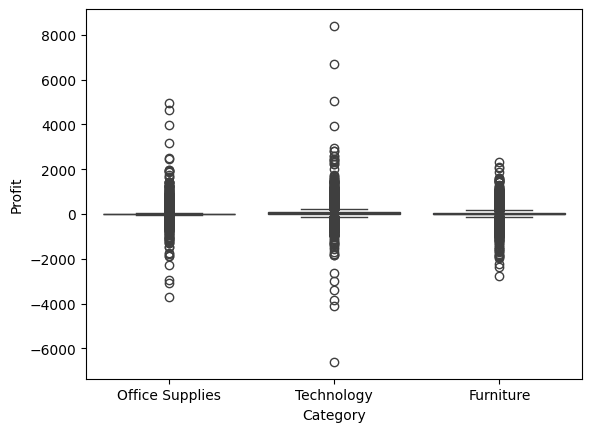

In [ ]:
#Boxplot of Profit by Category
sns.boxplot(x='Category', y='Profit', data=df)
plt.show()

In [ ]:
# topt ten most profitable products
most_profitable_products = (
    df.groupby(['Product.Name', 'Category'])['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

most_profitable_products


,Product.Name,Category,Profit
0,Canon imageCLASS 2200 Advanced Copier,Technology,25199.9280
1,"Cisco Smart Phone, Full Size",Technology,17238.5206
2,"Motorola Smart Phone, Full Size",Technology,17027.1130
3,"Hoover Stove, Red",Office Supplies,11807.9690
4,"Sauder Classic Bookcase, Traditional",Furniture,10672.0730
5,"Harbour Creations Executive Leather Armchair, ...",Furniture,10427.3260
6,"Nokia Smart Phone, Full Size",Technology,9938.1955
7,"Cisco Smart Phone, with Caller ID",Technology,9786.6408
8,"Nokia Smart Phone, with Caller ID",Technology,9465.3257
9,"Belkin Router, USB",Technology,8955.0180


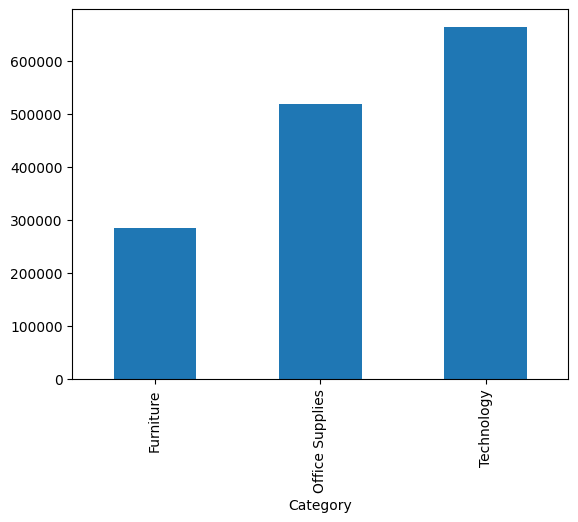

In [ ]:
#plotting profit per categories
profit_per_category = df.groupby('Category')['Profit'].sum()
profit_per_category.plot(kind='bar')
plt.show()

## 📌 Analysis Summary
- **Office Supplies** are the most frequently sold category.
- **Technology** is the most profitable category — 7 out of 10 top products belong here.
- **July** tends to have a noticeable dip in sales each year.
- Profit margins vary significantly across categories and regions.
- Data visualization provides valuable insights for decision-making in inventory and marketing.

# FURTHER ANALYSIS

In [ ]:
df['Profit.Margin'] = df['Profit'] / df['Sales']

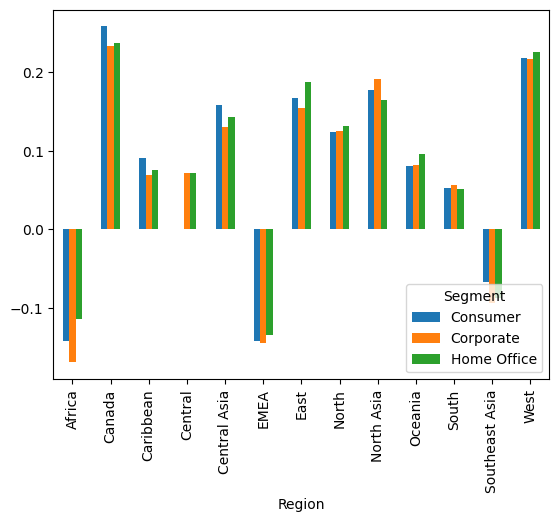

In [ ]:
#Which customer segments in each region contribute the highest profit margins, and how do they vary across months?
df.groupby(['Region', 'Segment'])['Profit.Margin'].mean().unstack().plot(kind='bar')
plt.show()

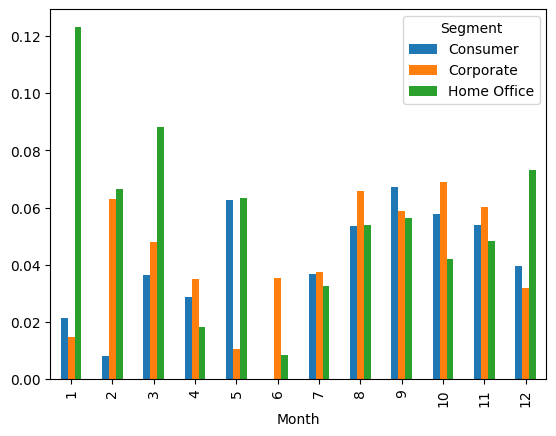

In [ ]:
df.groupby(['Month','Segment' ])['Profit.Margin'].mean().unstack().plot(kind='bar')
plt.show()

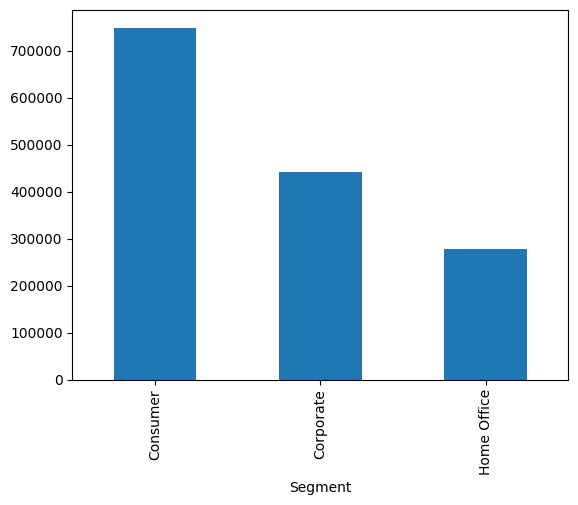

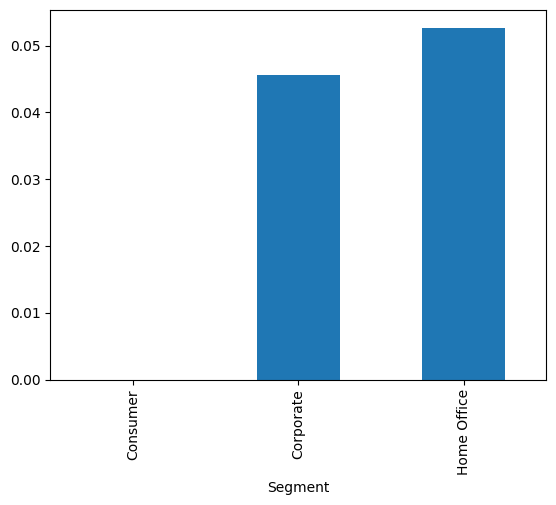

In [ ]:
# Comparison of profit margins per segment
df.groupby('Segment')['Profit'].sum().plot(kind='bar')
plt.show()
df.groupby('Segment')['Profit.Margin'].mean().plot(kind='bar')
plt.show()

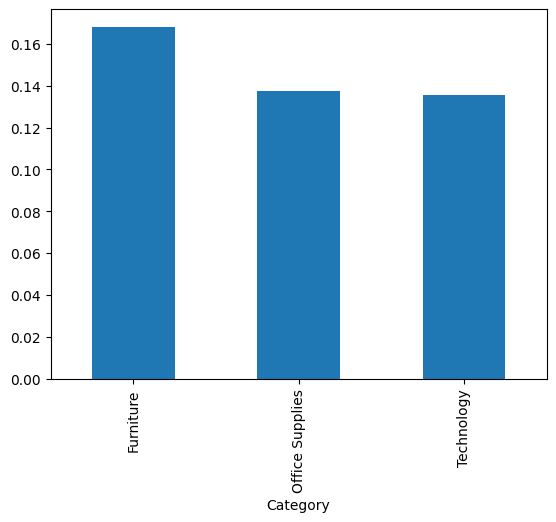

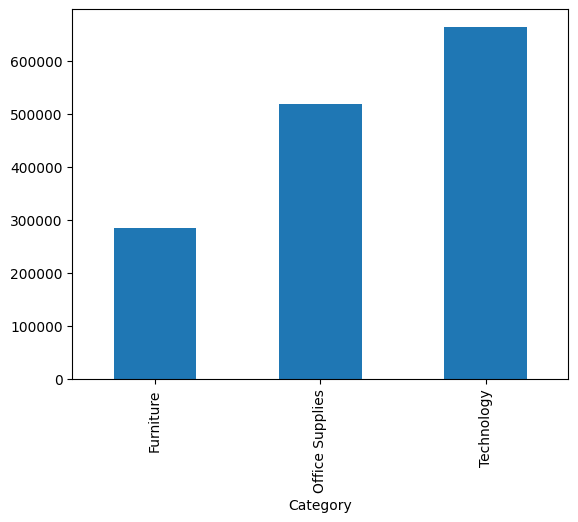

In [ ]:
#Is discounting positively or negatively affecting profitability across different product categories?

df.groupby('Category')['Discount'].mean().plot(kind='bar')
plt.show()
df.groupby('Category')['Profit'].sum().plot(kind='bar')
plt.show()

Correlation between Discount and Profit in each Category:
Category
Furniture         -0.492226
Office Supplies   -0.253860
Technology        -0.376786
Name: (Discount, Profit), dtype: float64


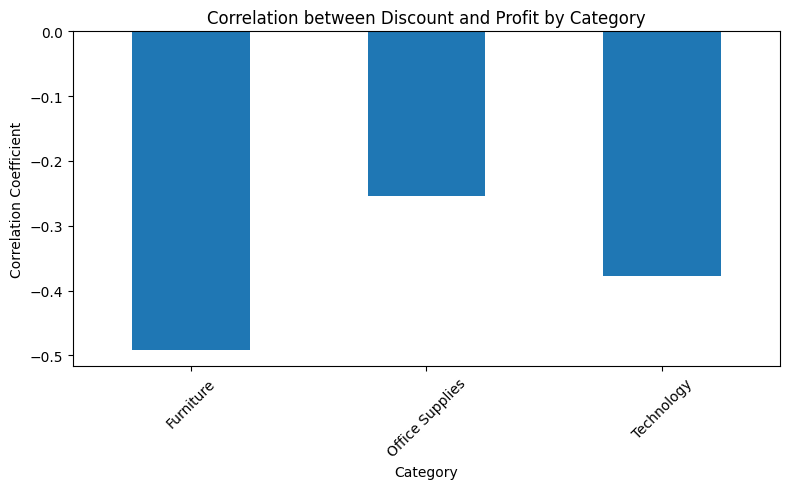

In [ ]:
#Analyze the correlation between Discount and Profit in each Category.

correlation_by_category = df.groupby('Category')[['Discount', 'Profit']].corr().unstack().iloc[:,1]

print("Correlation between Discount and Profit in each Category:")
print(correlation_by_category)

# You can also visualize this correlation
plt.figure(figsize=(8, 5))
correlation_by_category.plot(kind='bar')
plt.title('Correlation between Discount and Profit by Category')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Are there certain cities that generate high sales but low profits, or vice versa?
topsales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
topprofit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)

display(topsales, topprofit)

,Sales
City,
New York City,256397
Los Angeles,175857
Manila,120896
Seattle,119552
San Francisco,112690
Philadelphia,109085
Sydney,101952
Jakarta,94318
London,86945


,Profit
City,
New York City,62036.98370
Los Angeles,30440.75790
Seattle,29156.09670
Managua,17853.71804
San Francisco,17507.38540
London,17378.71500
Sydney,16002.80700
Vienna,15660.84000
San Salvador,15036.51040


In [ ]:
# show which cities are in both the topsales and topprofits dfs and show the ones that are not in both, i,e are in one only

# Convert the index (cities) to sets for easier comparison
topsales_cities = set(topsales.index)
topprofit_cities = set(topprofit.index)

# Find cities that are in both sets (common cities)
cities_in_both = topsales_cities.intersection(topprofit_cities)

# Find cities that are only in topsales
cities_only_in_topsales = topsales_cities.difference(topprofit_cities)

# Find cities that are only in topprofit
cities_only_in_topprofit = topprofit_cities.difference(topsales_cities)

print("Cities in both top sales and top profit lists:")
print(cities_in_both)

print("\nCities in the top sales list but NOT in the top profit list:")
print(cities_only_in_topsales)

print("\nCities in the top profit list but NOT in the top sales list:")
cities_only_in_topprofit

Cities in both top sales and top profit lists:
{'Seattle', 'London', 'New York City', 'Sydney', 'San Francisco', 'Mexico City', 'Los Angeles'}

Cities in the top sales list but NOT in the top profit list:
{'Philadelphia', 'Jakarta', 'Manila'}

Cities in the top profit list but NOT in the top sales list:


{'Managua', 'San Salvador', 'Vienna'}

# 📦 Shipping & Operations

In [ ]:
df['Shipping.Duration'] = df['Shipping.Duration'].dt.days

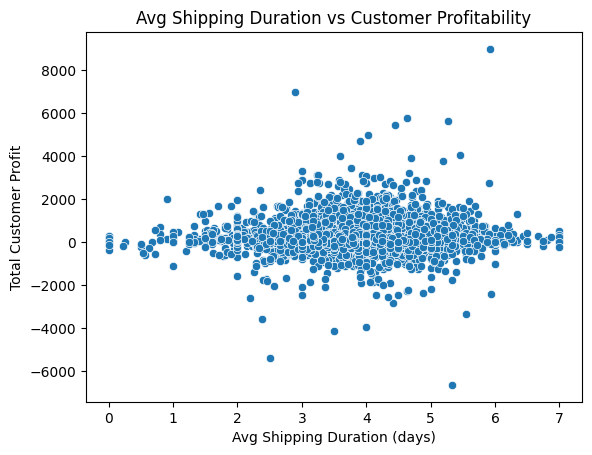

In [ ]:
#How does shipping duration affect customer profitability or satisfaction proxies (e.g. return frequency or negative margins)?

customer_stats = df.groupby('Customer.ID').agg({
    'Profit': 'sum',
    'Shipping.Duration': 'mean',
    'Order.ID': 'count'
}).rename(columns={'Order.ID': 'Order.Frequency'}).reset_index()

import seaborn as sns


sns.scatterplot(x='Shipping.Duration', y='Profit', data=customer_stats)
plt.title('Avg Shipping Duration vs Customer Profitability')
plt.xlabel('Avg Shipping Duration (days)')
plt.ylabel('Total Customer Profit')
plt.show()


In [ ]:
correlation = customer_stats[['Shipping.Duration', 'Profit']].corr()
print(correlation)

                   Shipping.Duration    Profit
Shipping.Duration           1.000000  0.027951
Profit                      0.027951  1.000000


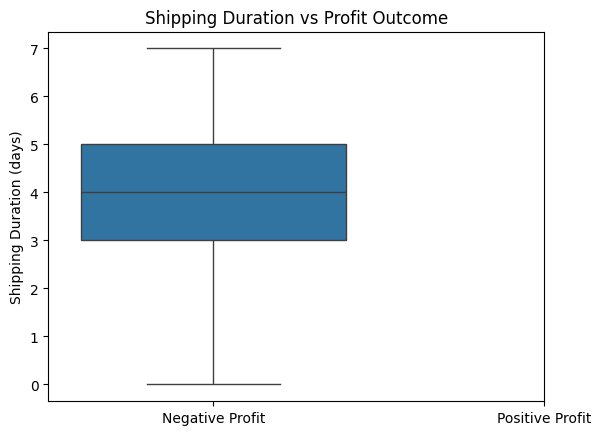

In [ ]:
# Are Negative Profit Orders Linked to Longer Shipping Durations?
df['Is.Negative.Profit'] = df['Profit'] < 0

negative_ship_duration = df[df['Is.Negative.Profit'] == True]['Shipping.Duration']
positive_ship_duration = df[df['Is.Negative.Profit'] == False]['Shipping.Duration']

# Compare using boxplot
sns.boxplot(data=[negative_ship_duration, positive_ship_duration])
plt.xticks([0, 1], ['Negative Profit', 'Positive Profit'])
plt.ylabel('Shipping Duration (days)')
plt.title('Shipping Duration vs Profit Outcome')
plt.show()


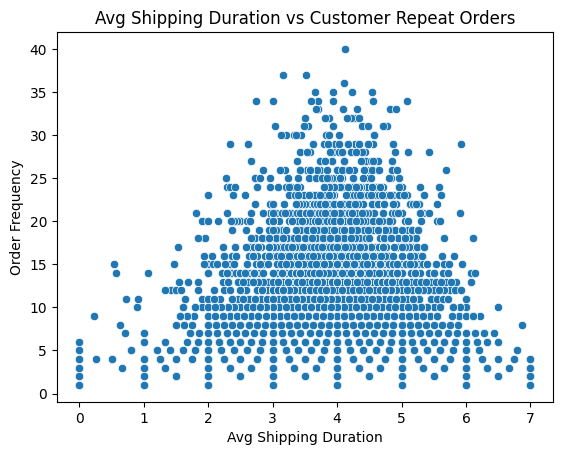

                   Shipping.Duration  Order.Frequency
Shipping.Duration           1.000000         0.047043
Order.Frequency             0.047043         1.000000


In [ ]:
#Do Customers with Longer Shipping Durations Come Back Less Often?
sns.scatterplot(x='Shipping.Duration', y='Order.Frequency', data=customer_stats)
plt.title('Avg Shipping Duration vs Customer Repeat Orders')
plt.xlabel('Avg Shipping Duration')
plt.ylabel('Order Frequency')
plt.show()

# Correlation
print(customer_stats[['Shipping.Duration', 'Order.Frequency']].corr())


Are shipping costs optimized for profitability? For example, are high shipping costs associated with high-margin products or not?

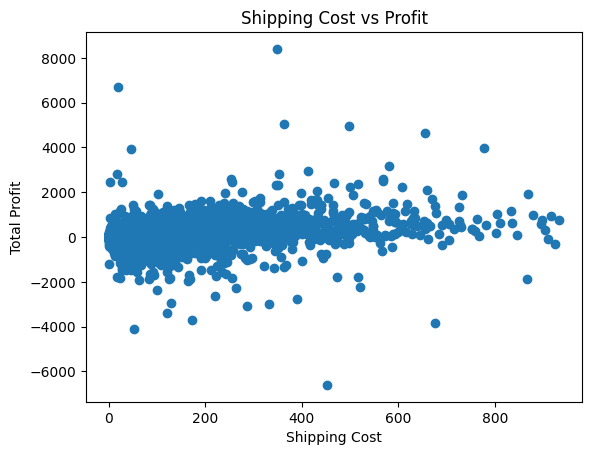

In [ ]:
plt.scatter(x = df['Shipping.Cost'], y = df['Profit'])
plt.title('Shipping Cost vs Profit')
plt.xlabel('Shipping Cost')
plt.ylabel('Total Profit')
plt.show()

# 🧍 Customer Behavior & Lifetime Value

In [ ]:
#Who are the top 10 most profitable customers over time, and what is their purchasing pattern (e.g., frequency, product types)?
df.groupby(['Customer.ID', 'Customer.Name'])['Profit'].sum().sort_values(ascending=False).head(10)

,,Profit
Customer.ID,Customer.Name,
TC-209804,Tamara Chand,8981.3239
RB-193604,Raymond Buch,6976.0959
SC-200954,Sanjit Chand,5757.4119
HL-150404,Hunter Lopez,5622.4292
AB-101054,Adrian Barton,5444.8055
SP-209202,Susan Pistek,4974.5130
TA-213854,Tom Ashbrook,4703.7883
CA-127751,Cynthia Arntzen,4045.8780
PJ-188352,Patrick Jones,3986.0040


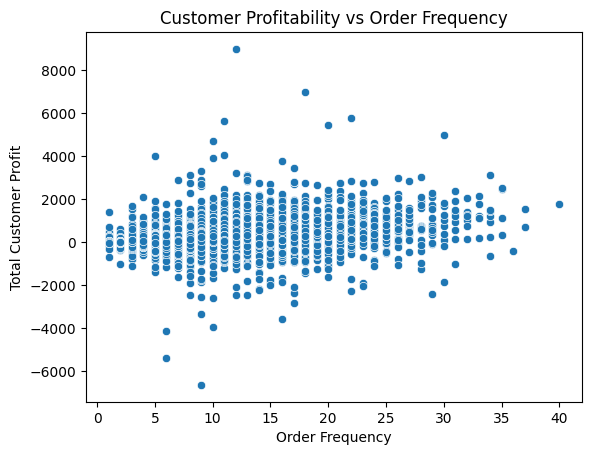

In [ ]:
#Is there a correlation between order frequency and customer profitability?
import seaborn as sns
customer_stats = df.groupby('Customer.ID').agg({
    'Profit': 'sum',
    'Order.ID': 'count'
}).rename(columns={'Order.ID': 'Order.Frequency'}).reset_index()

sns.scatterplot(x='Order.Frequency', y='Profit', data=customer_stats)
plt.title('Customer Profitability vs Order Frequency')
plt.xlabel('Order Frequency')
plt.ylabel('Total Customer Profit')
plt.show()

#

In [ ]:
#Can you identify customer churn? (e.g., customers who made multiple purchases early but none in the recent months?)

customer_activity = df.groupby('Customer.ID').agg(
    First_Purchase=('Order.Date', 'min'),
    Last_Purchase=('Order.Date', 'max'),
    Order_Count=('Order.ID', 'nunique'),
    Customer_Name=('Customer.Name', 'first')
).reset_index()

#We’ll say a customer is churned if they haven’t ordered in the last 6 months of the dataset.
# Find the latest date in the dataset
latest_date = df['Order.Date'].max()
churn_threshold = latest_date - pd.DateOffset(months=6)

# Mark churned customers
customer_activity['Churned'] = customer_activity['Last_Purchase'] < churn_threshold

#Filter for churned customers who had made multiple purchases before

churned_customers = customer_activity[
    (customer_activity['Churned'] == True) &
    (customer_activity['Order_Count'] >= 2)
]

#Display churned customers
churned_customers[['Customer.ID','Customer_Name', 'Order_Count', 'First_Purchase', 'Last_Purchase']]




,Customer.ID,Customer_Name,Order_Count,First_Purchase,Last_Purchase
2,AA-103153,Alex Avila,2,2011-11-24,2013-02-05
5,AA-103752,Allen Armold,3,2012-03-23,2014-02-17
9,AA-104802,Andrew Allen,7,2011-11-01,2014-05-16
10,AA-104803,Andrew Allen,4,2012-09-06,2014-05-09
11,AA-104804,Andrew Allen,4,2011-05-04,2014-04-16
...,...,...,...,...,...
4858,YS-218801,Yana Sorensen,4,2013-04-09,2014-05-12
4859,YS-218802,Yana Sorensen,6,2011-10-21,2014-06-17
4868,ZD-119252,Zuschuss Donatelli,6,2011-12-07,2013-11-29
4871,ZD-219253,Zuschuss Donatelli,3,2012-11-26,2014-06-18


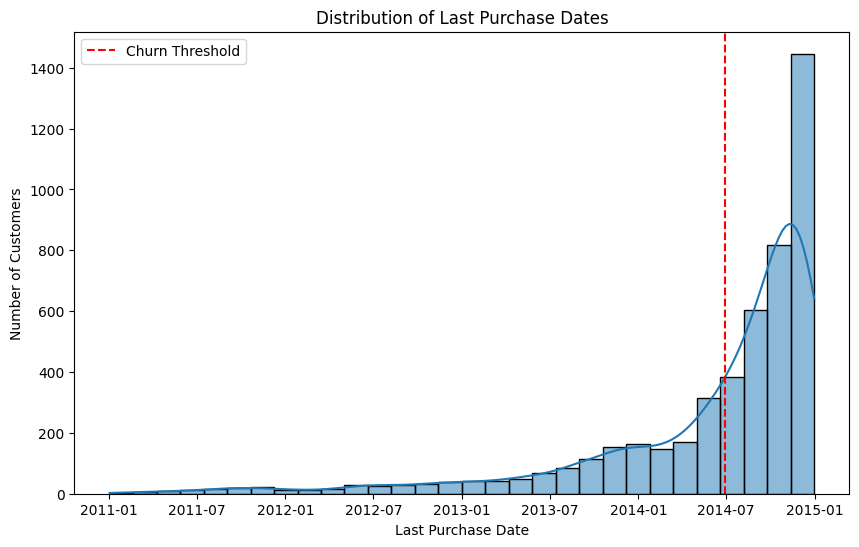

In [ ]:
#visualize churn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(customer_activity['Last_Purchase'], bins=30, kde=True)
plt.axvline(churn_threshold, color='red', linestyle='--', label='Churn Threshold')
plt.title('Distribution of Last Purchase Dates')
plt.xlabel('Last Purchase Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()


In [ ]:
# use customer id in churned and df to output a list of churned customers and their regions

# Merge churned_customers with the original df to get region information
churned_with_region = pd.merge(
    churned_customers[['Customer.ID', 'Customer_Name']],
    df[['Customer.ID', 'Region']].drop_duplicates(),
    on='Customer.ID',
    how='left'
)

# Get unique churned customers and their regions
churned_customer_regions = churned_with_region[['Customer.ID', 'Customer_Name', 'Region']].drop_duplicates().reset_index(drop=True)

# Output the list
print("List of Churned Customers and their Regions:")
churned_customer_regions

List of Churned Customers and their Regions:


,Customer.ID,Customer_Name,Region
0,AA-103153,Alex Avila,North
1,AA-103752,Allen Armold,South
2,AA-103752,Allen Armold,Central
3,AA-104802,Andrew Allen,North
4,AA-104802,Andrew Allen,Central
...,...,...,...
2768,ZD-219253,Zuschuss Donatelli,South
2769,ZD-219253,Zuschuss Donatelli,North
2770,ZD-219254,Zuschuss Donatelli,West
2771,ZD-219254,Zuschuss Donatelli,Central


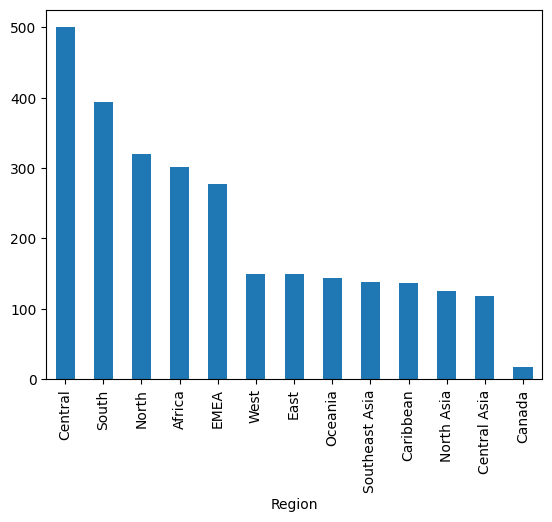

In [ ]:
#plot showing the amount of customers churned by region
churned_customer_regions['Region'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.to_csv('superstore2.csv')